#Monthly summaries
Generate plots and statistics for all monthly analyses

In [1]:
%matplotlib inline
import glob, pickle
from uw.like2.analyze import sourceinfo; reload(sourceinfo)
curdir = os.getcwd()
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))

In [2]:
files =  sorted(glob.glob('month*/sources.pickle'));
monthlist = [f.split('/')[0] for f in files]; monthlist
sourcelists = [pickle.load(open(f)) for f in files]
t = dict()
for month,sm in zip(monthlist, sourcelists):
    t[month]= dict(ntot=len(sm),
                          ntrans=sum(sm.transient &(sm.ts>10)),
               )
monthsdf = pd.DataFrame(t).T
monthsdf

KeyboardInterrupt: 

##Most recent stream for each month

In [70]:
from uw.like2.pipeline import stream; reload(stream)
pd.DataFrame(stream.recent_stream('P301_monthly*', lambda m:len(m)==7 and m>'month64')).T

,date,stage,stream
month65,2015-08-15 13:16,finish_month,1795
month66,2015-08-15 12:08,finish_month,1781
month67,2015-08-15 13:26,finish_month,1797
month68,2015-08-15 13:08,finish_month,1793
month69,2015-08-15 12:10,finish_month,1782
month70,2015-08-15 11:32,finish_month,1770
month71,2015-08-15 11:43,finish_month,1776
month72,2015-08-15 11:49,finish_month,1778


###plots for a given month
use the SourceInfo sub class for access to functions to generate plots

In [5]:
# from uw.like2.analyze import sourceinfo; reload(sourceinfo)
self=sourceinfo.ExtSourceInfo('month01')        

In [6]:
self.df['prefix'] = [n[:2] for n in self.df.index]
self.df['fixed'] = [not x for x in self.df.transient]

In [7]:
hilat = np.abs(self.df.glat)>10
goodloc = self.df.locqual<5

1068


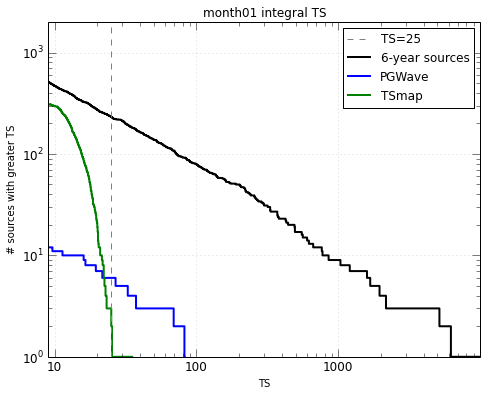

In [8]:
df=self.df[hilat & goodloc]
print len(df)
fig=self.cumulative_ts(check_localized=False, tscut=[],
                  ts = df.ts[df.fixed], label='6-year sources',
                  other_ts=[df.ts[df.prefix=='PG'],
                            df.ts[df.prefix=='Sh']],
                  other_label=['PGWave', 'TSmap']);
plt.setp(fig.axes[0], ylim=(1,2000), title='month01 integral TS');

###Do all months

In [9]:
monthinfo = [sourceinfo.ExtSourceInfo(month) for month in monthlist]

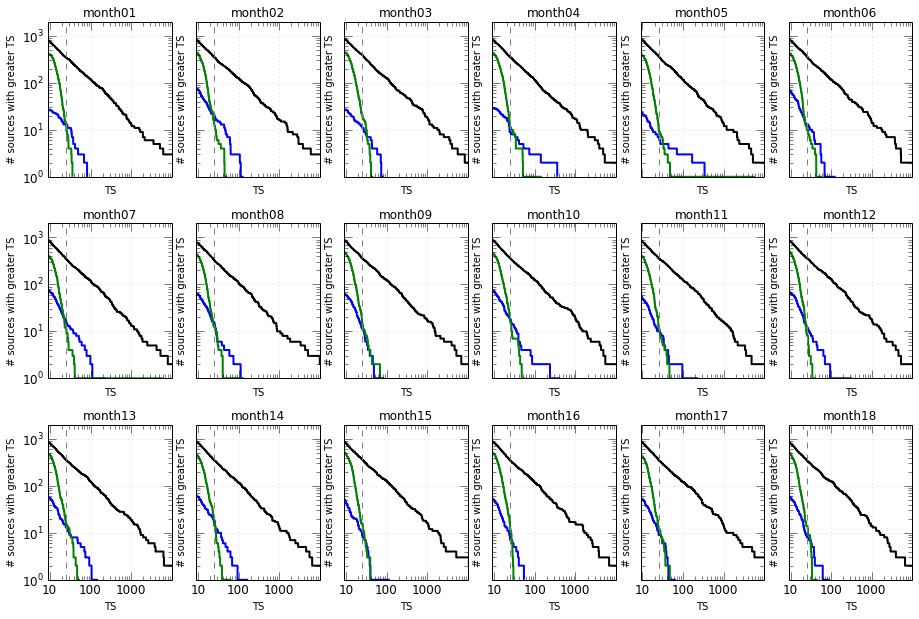

In [15]:
fig, axx = plt.subplots(3,6, sharex=True, sharey=True, figsize=(16,10))
plt.subplots_adjust(hspace=0.3)
for ax, info, month,  in zip(axx.flatten(), monthinfo, monthlist):
    df=info.df
    df['prefix'] = [n[:2] for n in df.index]
    df['fixed'] = [not x for x in df.transient]
    fig=info.cumulative_ts(ax=ax, check_localized=False, tscut=[],
                ts = df.ts[df.fixed], label='6-year sources',
                other_ts=[df.ts[df.prefix=='PG'],
                           df.ts[(df.prefix=='Sh') | (df.prefix=='S ')|(df.prefix=='TS')]] ,
                other_label=['PGWave', 'TSmap'], 
                legend=False,
                );
    plt.setp(ax, title=month, ylim=(1,2000))

##Compare?
Are the apparent new transient sources in the same positions?
Make a combined list to plot with Aladin

In [11]:
dflist= []
for i,month in enumerate(monthinfo):
    month.df['month'] = i+1
    month.df['has_assoc'] = [a is not None for a in month.df.associations]
    dflist.append( month.df[month.df.transient]['ra dec glat glon ts locqual has_assoc month'.split()])
dfall = pd.concat(dflist) 
len(dfall)

10491

In [12]:
dfall[:10]

,ra,dec,glat,glon,ts,locqual,has_assoc,month
name,,,,,,,,
Sh01-0642,0.243475,62.867902,0.5576553,117.2155,12.90328,1.42,False,1
Sh01-1311,1.069955,-46.734498,-68.30334,325.1903,11.75631,1.21,False,1
Sh01-0534,3.533811,67.221005,4.611031,119.3235,13.94693,0.69,False,1
PGW_01_109_03,3.742045,59.837045,-2.710553,118.3606,18.41618,3.44,False,1
Sh01-1194,4.204439,21.242102,-40.90954,112.2369,9.4905,0.03,False,1
Sh01-1314,5.302751,-44.826642,-71.29614,319.8408,12.467,1.76,False,1
Sh01-0967,6.156521,45.529641,-17.08645,118.0251,17.90687,0.45,False,1
Sh01-1296,7.632659,-0.846135,-63.24306,111.2598,19.94052,0.54,False,1
Sh01-1103,13.553484,32.959367,-29.90871,123.6043,11.57256,3.44,False,1


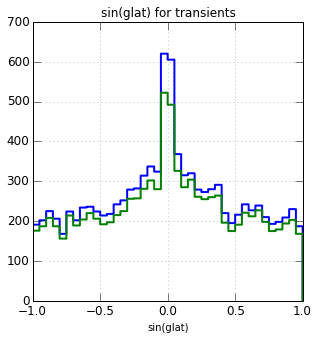

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
dfall['singlat'] =np.sin(np.radians(np.asarray(dfall.glat,float)))
hist_kw=dict( histtype='step', lw=2)
ax.hist(dfall.singlat, np.linspace(-1,1,41), **hist_kw)
ax.hist(dfall.singlat[dfall.locqual<5], np.linspace(-1,1,41), **hist_kw)
ax.grid(True, alpha=0.5)
plt.setp(ax, title='sin(glat) for transients', xlabel='sin(glat)');

write out the file

In [14]:
dfall.to_csv('transients.csv')

##Rerun all transient summaries

loading sources.pickle
transients: 578
loading sources.pickle
71 poorly localized (locqual>8.0 or a>0.25 or delta_ts>2.00) 
wrote file "poorly_localized.csv"
loading sources.pickle
Associations: set subset, 578 sources, to report on.
using associations found in sourceinfo
associated: 33/578
Saving fig cumulative_ts, ... to plots/transients/cumulative_ts_month06.jpg
3 sources flagged (1) in tails of flux, index, or beta
Saving fig non_psr_spectral_plots, ... to plots/transients/non_psr_spectral_plots_month06.jpg
Not generating plot for log-normal
3 sources with bad fits
3 sources with missing errors
fit quality averages: powerlaw: 9.1, logparabola: 0.0, expcutoff(hilat): 0.0, expcutoff(lolat): 0.0
1 sources flagged (2) as poor fits
Saving fig fit_quality, ... to plots/transients/fit_quality_month06.jpg
Pivot needs fixing: 145 sources
Saving fig pivot_vs_e0, ... to plots/transients/pivot_vs_e0_month06.jpg
Saving fig localization, ... to plots/transients/localization_month06.jpg
Saving fi

/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/pyfits/column.py:1040: VerifyWarning: Invalid keyword for column 1: Column start option (TBCOLn) is not allowed for binary table columns (got 10).  The invalid keyword will be ignored for the purpose of formatting the data in this column.
  VerifyWarning)
/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/pyfits/column.py:1040: VerifyWarning: Invalid keyword for column 2: Column start option (TBCOLn) is not allowed for binary table columns (got 21).  The invalid keyword will be ignored for the purpose of formatting the data in this column.
  VerifyWarning)
/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/pyfits/column.py:1040: VerifyWarning: Invalid keyword for column 3: Column start option (TBCOLn) is not allowed for binary table columns (got 28).  The invalid keyword will be ignored for the purpose of formatting the data in this column.
  VerifyWarning)
/

 to plots/transients/locqual_hist_month06.jpg
agns: 27
[14, 13, 0, 0, 0]
Writing bzcat summary to plots/associations/bzcat_summary.csv 
*** docstring processing problem: 'self.bzcat_html'
Saving fig bzcat_study, ... to plots/transients/bzcat_study_month06.jpg
**** failed to write footer: 'NoneType' object has no attribute 'group'
saved local menu to plots/transients/menu.html
saved html doc to plots/transients/index.html
wrote menu /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_monthly/month06/plots/index.html
loading sources.pickle
transients: 650
loading sources.pickle
80 poorly localized (locqual>8.0 or a>0.25 or delta_ts>2.00) 
wrote file "poorly_localized.csv"
loading sources.pickle
Associations: set subset, 650 sources, to report on.
using associations found in sourceinfo
associated: 37/650
Saving fig cumulative_ts, ... to plots/transients/cumulative_ts_month18.jpg
7 sources flagged (1) in tails of flux, index, or beta
Saving fig non_psr_spectral_plots, ... to plots/transie

/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


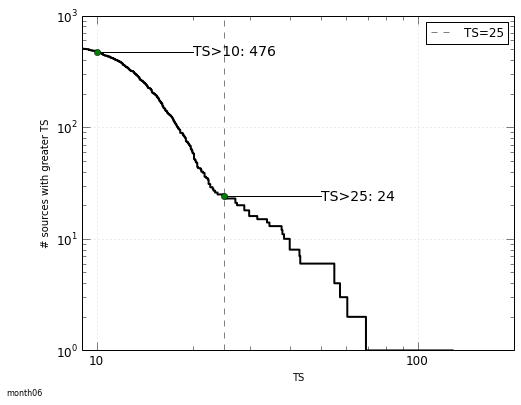

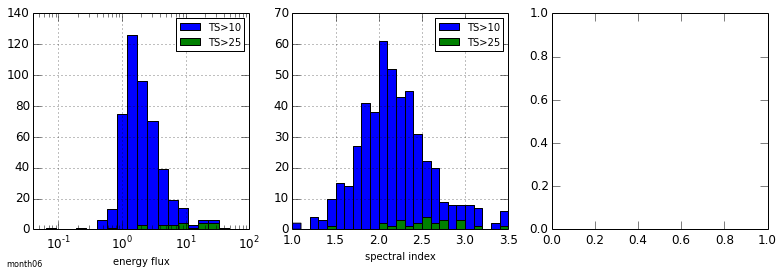

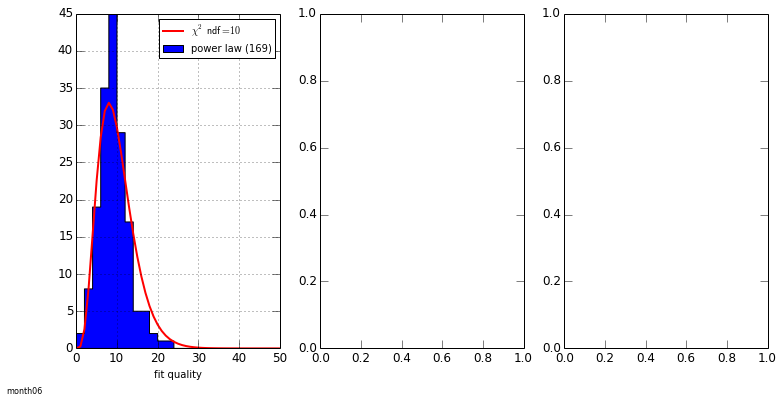

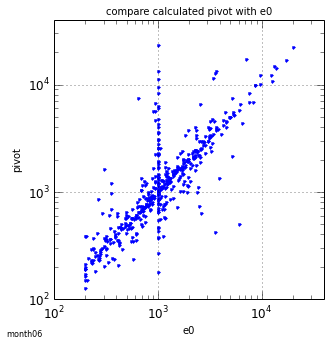

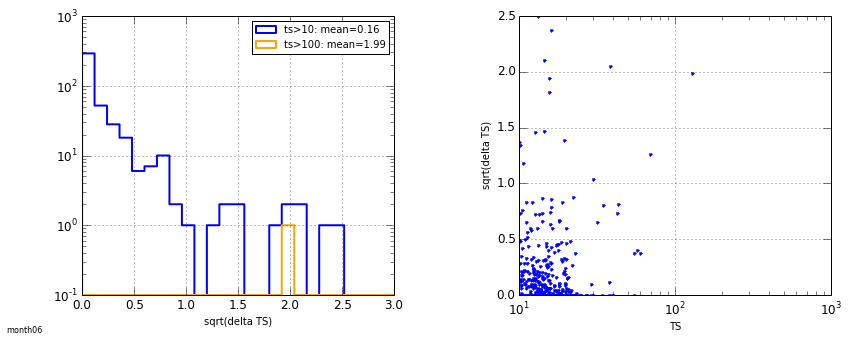

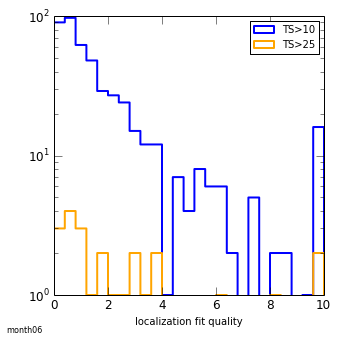

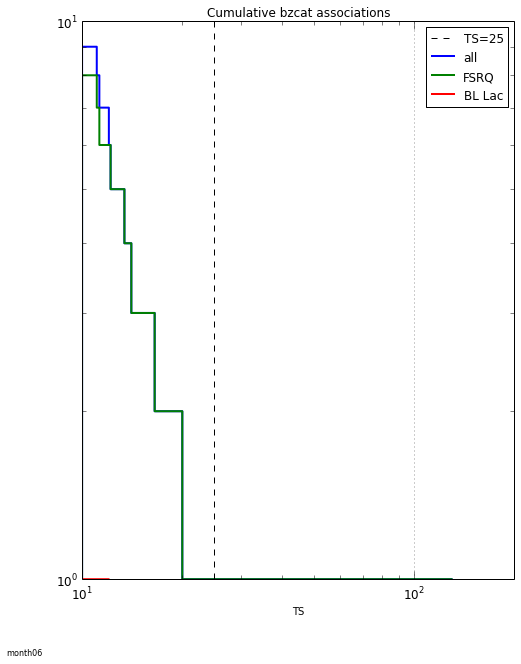

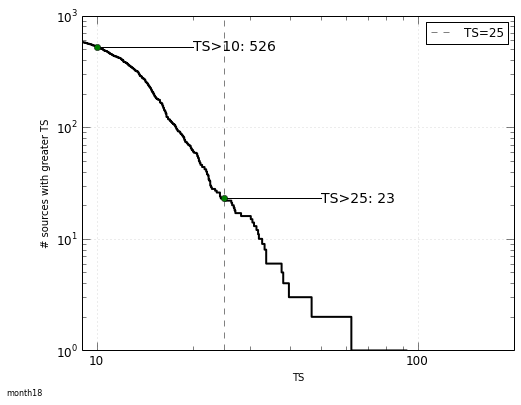

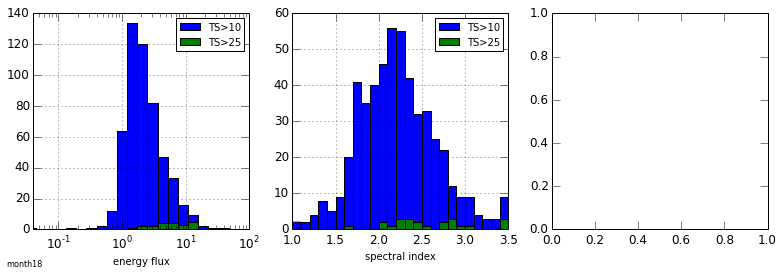

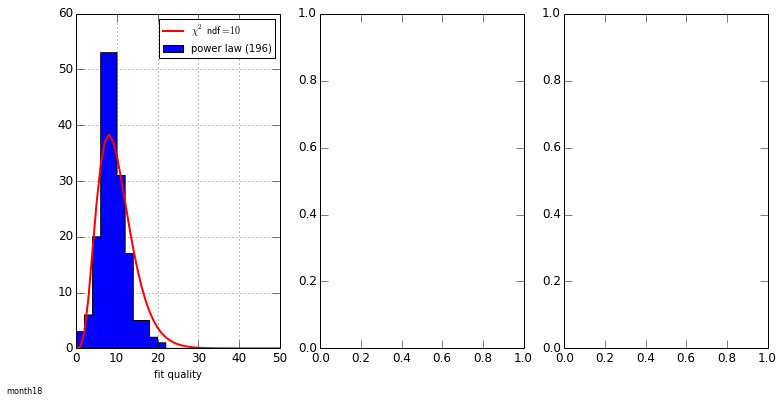

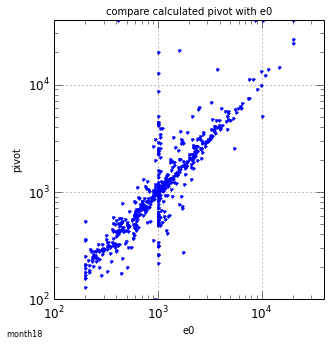

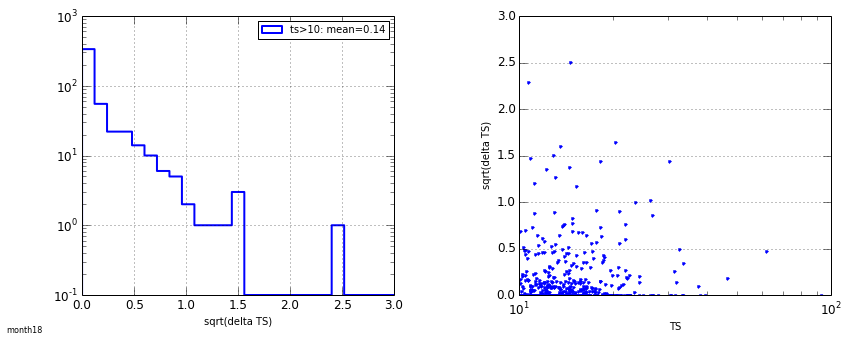

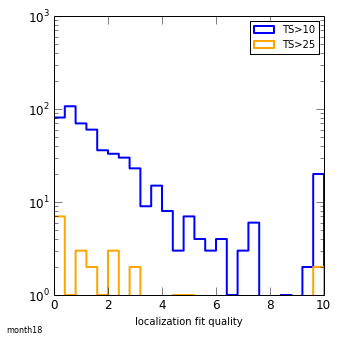

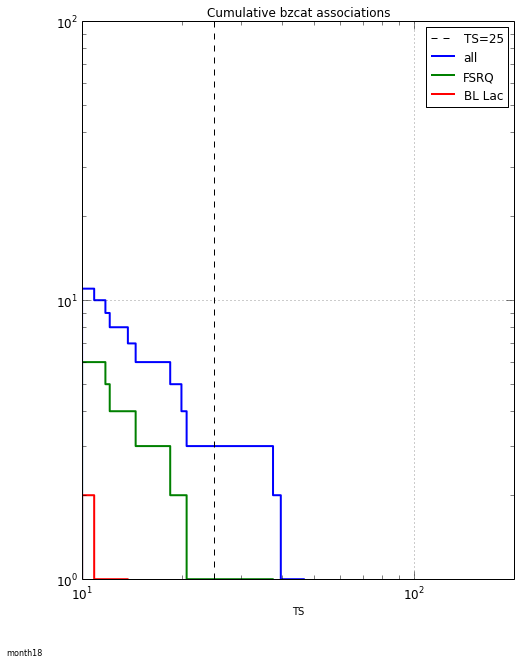

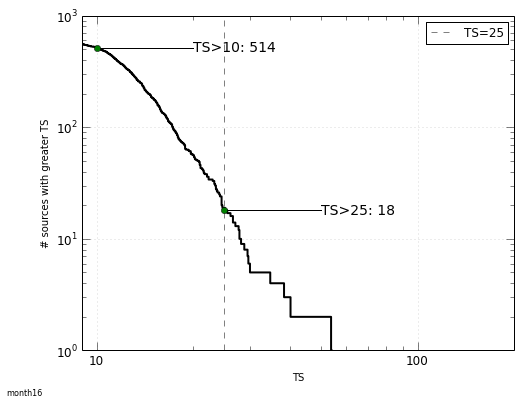

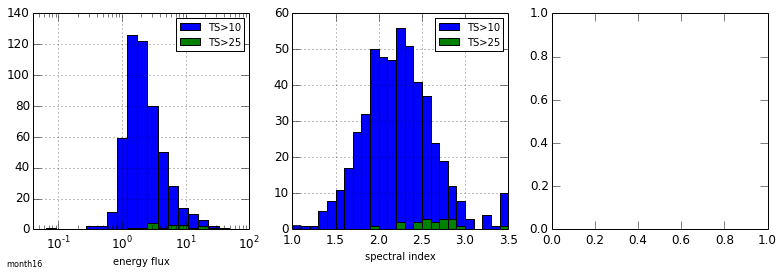

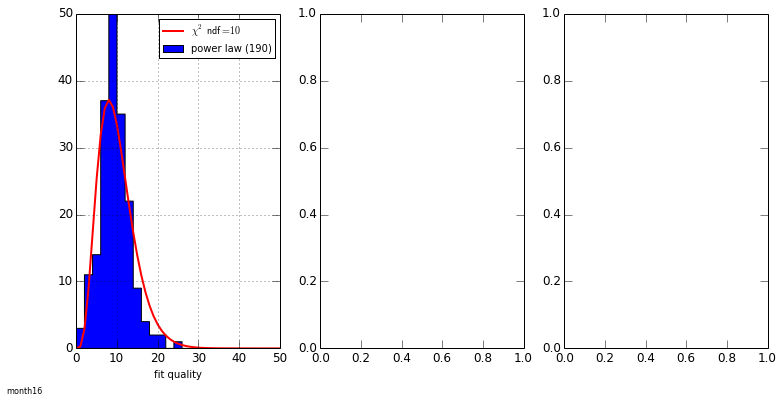

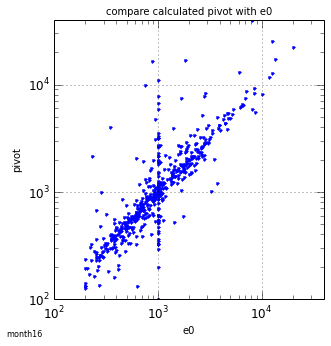

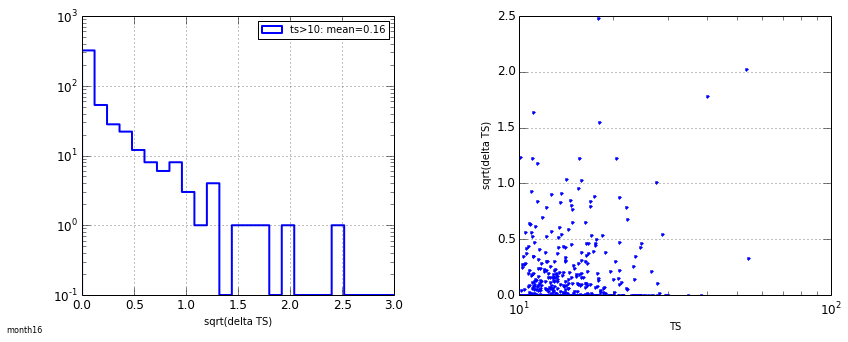

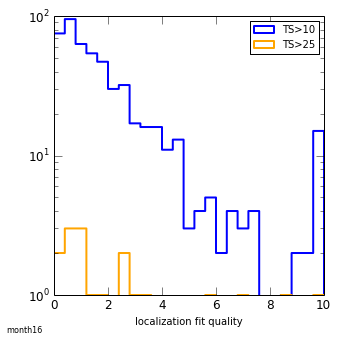

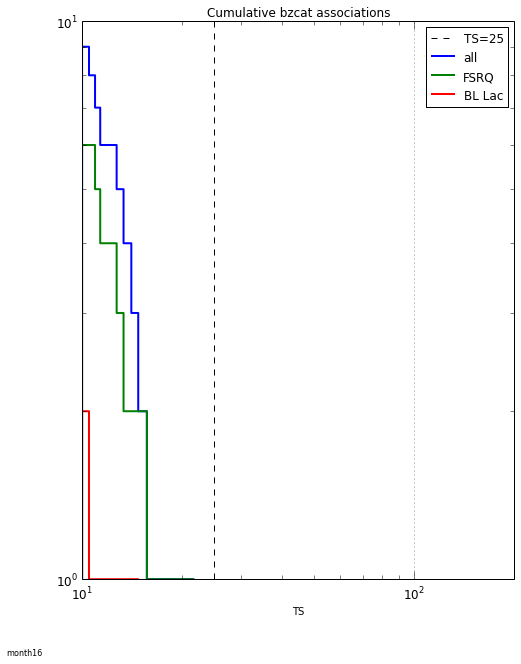

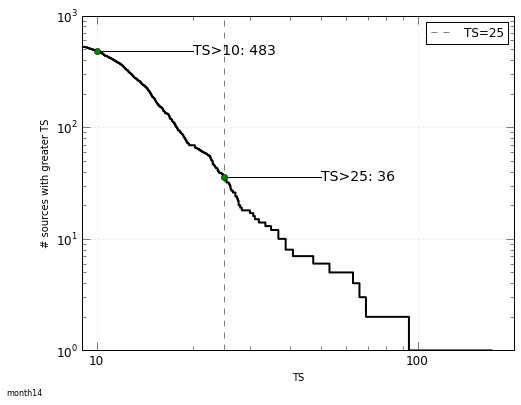

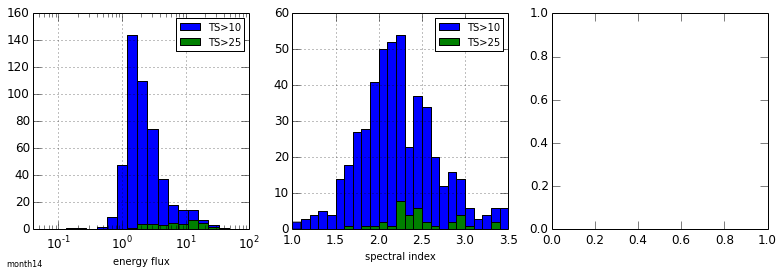

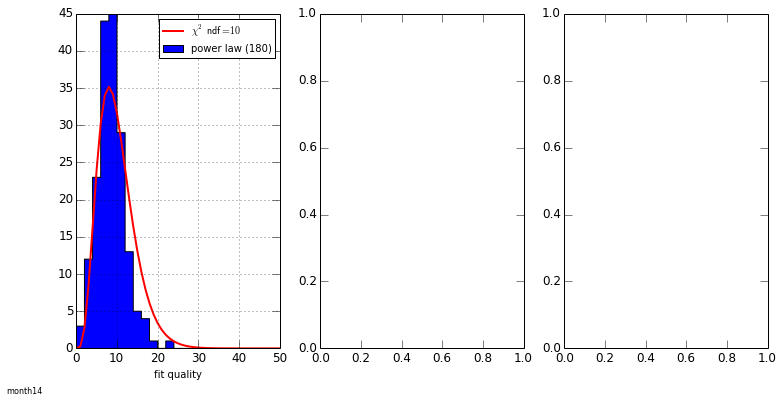

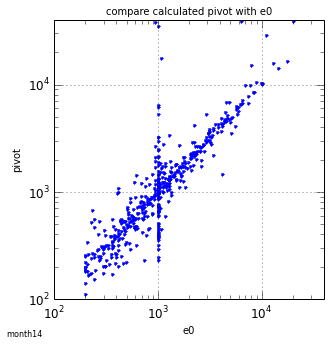

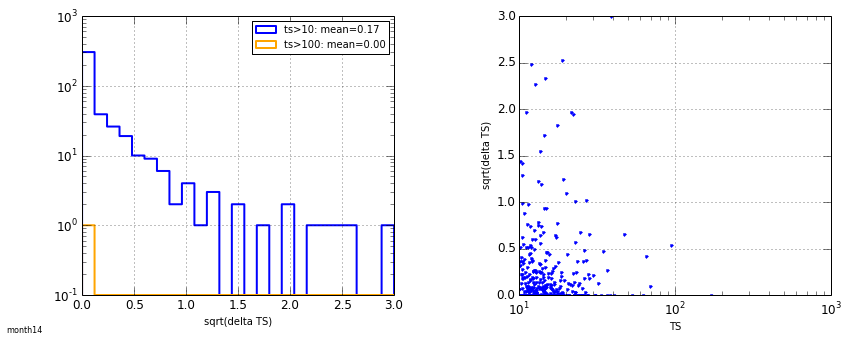

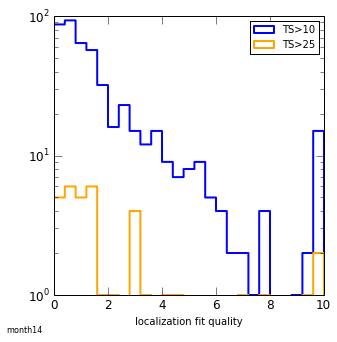

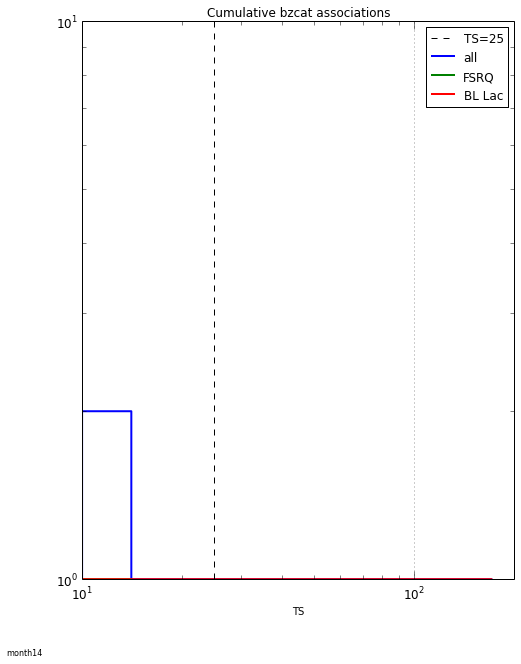

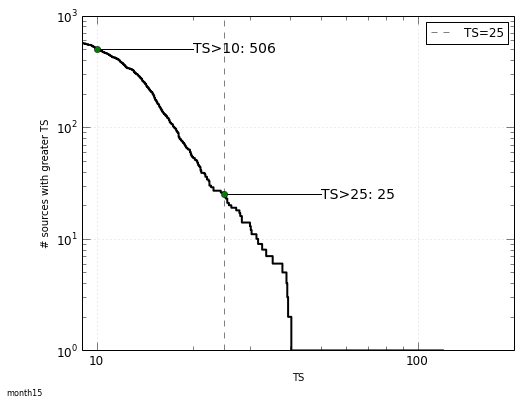

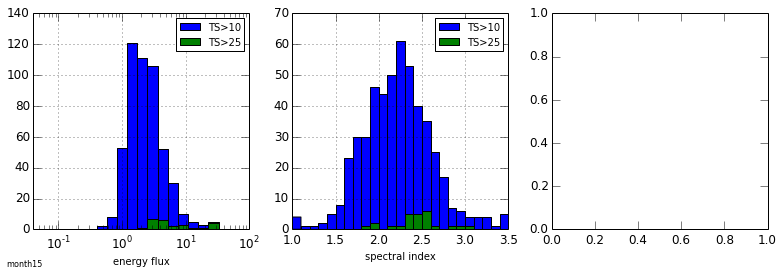

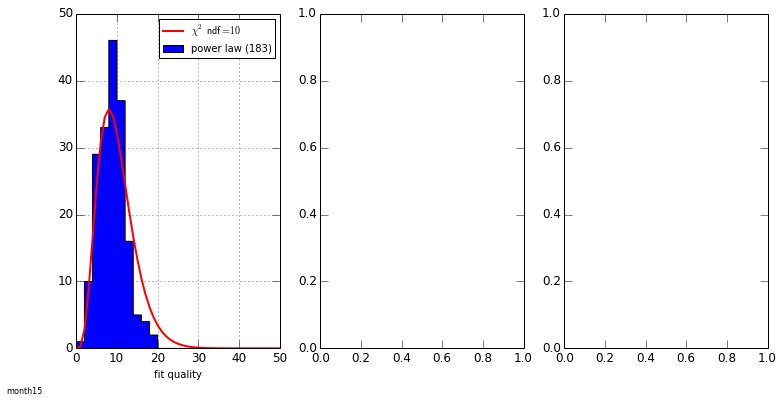

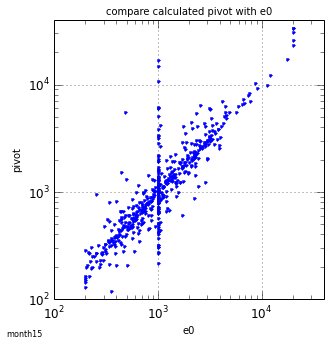

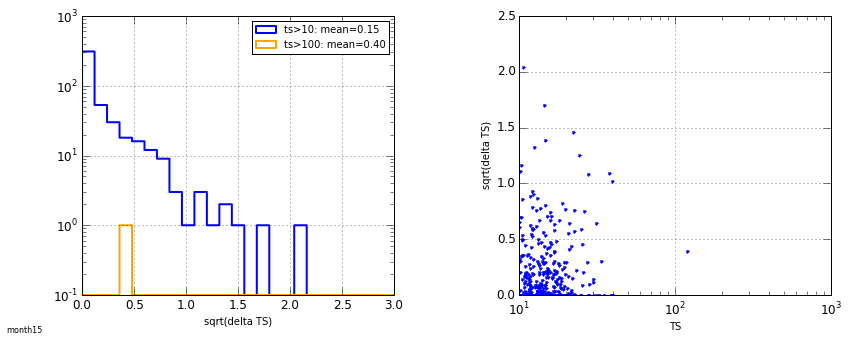

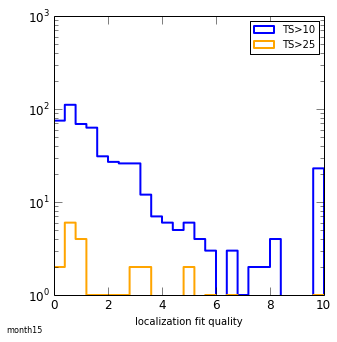

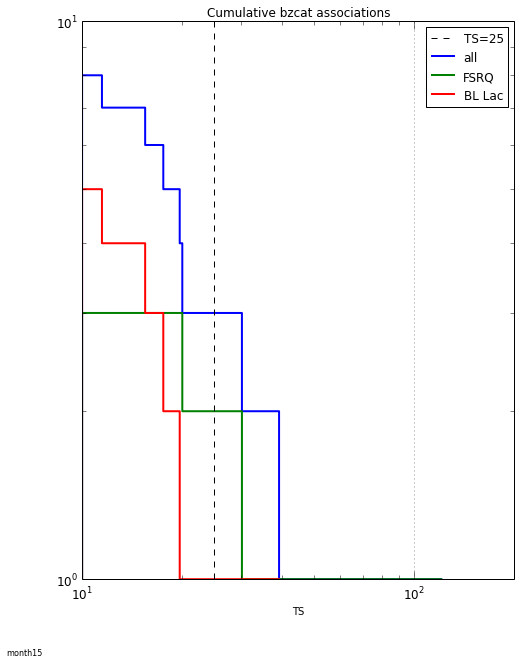

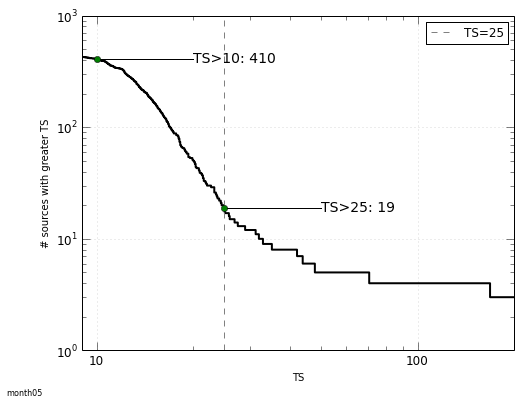

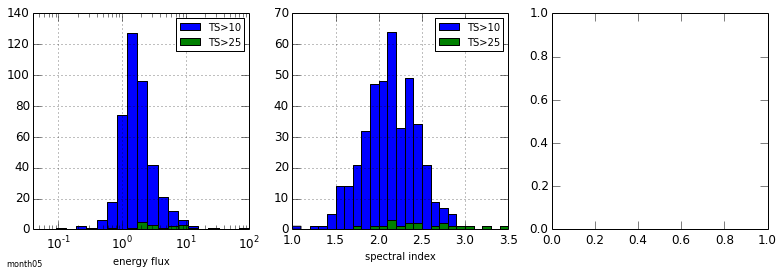

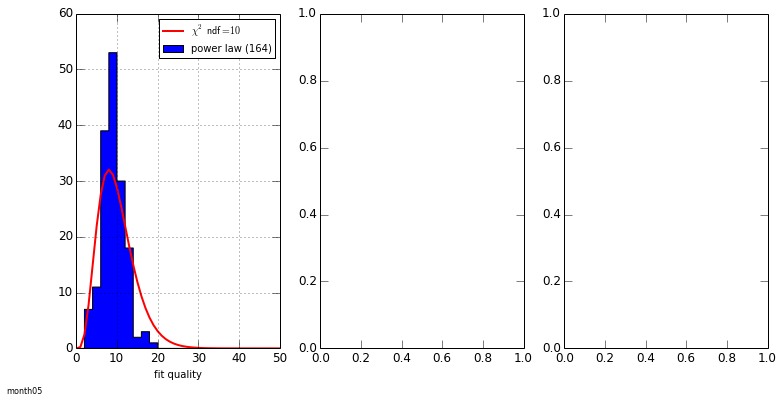

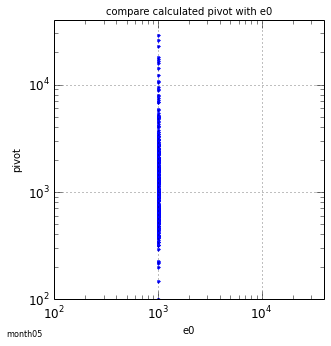

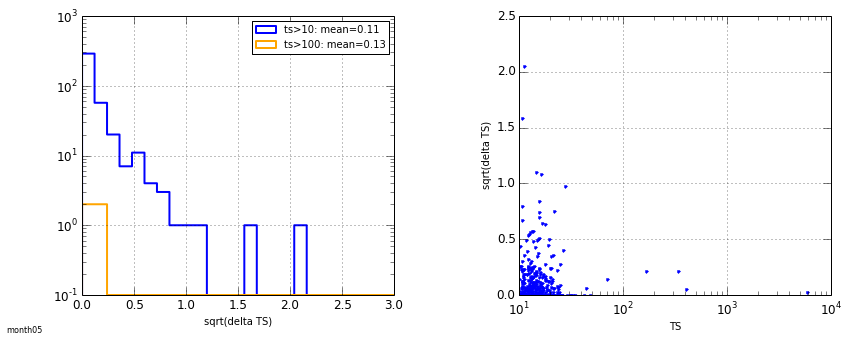

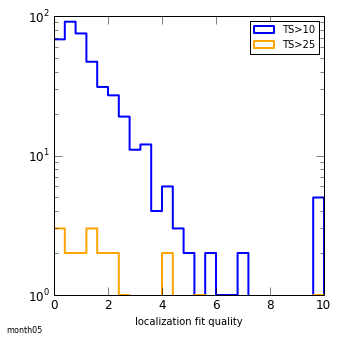

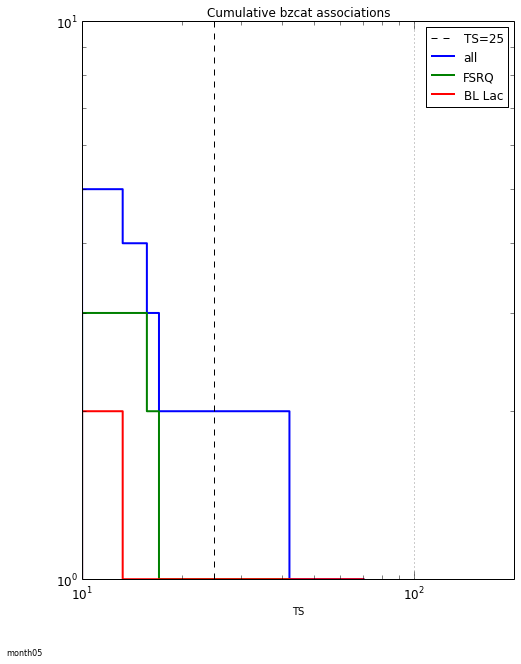

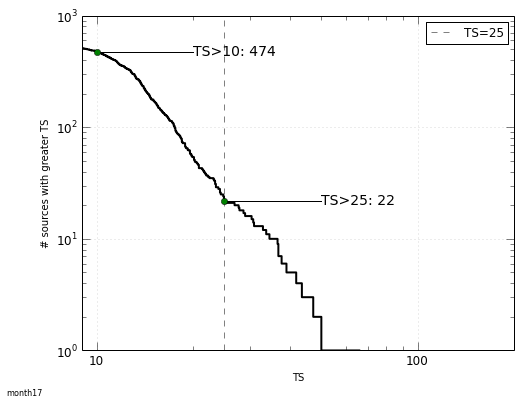

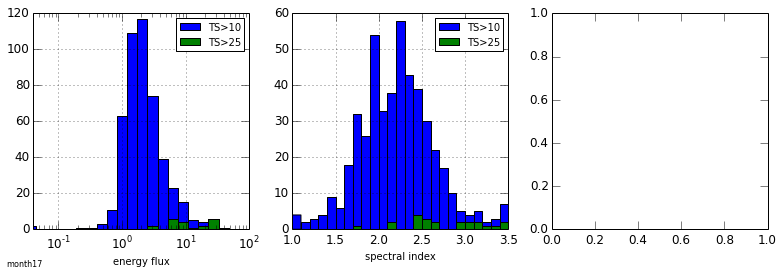

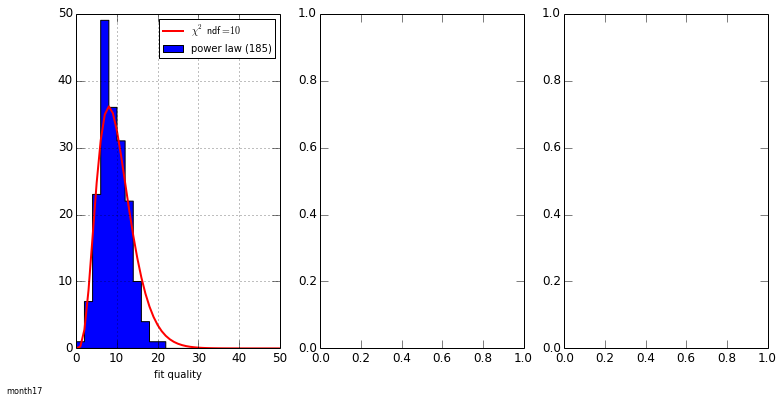

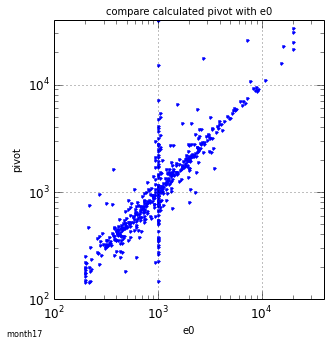

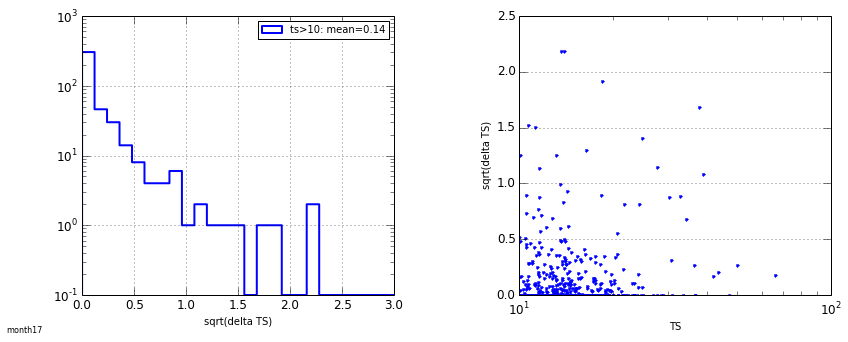

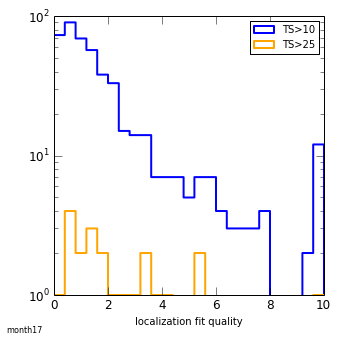

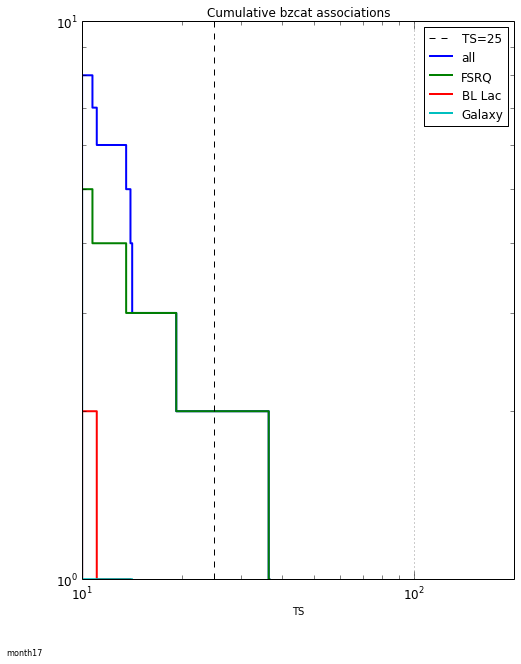

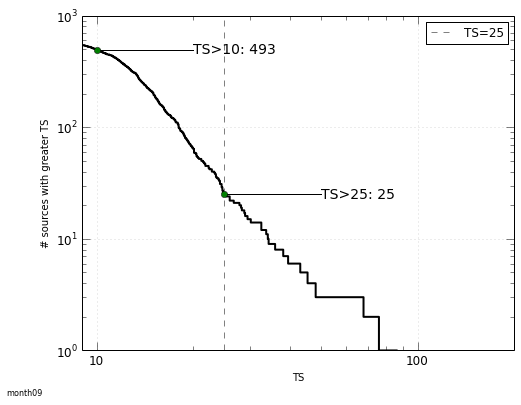

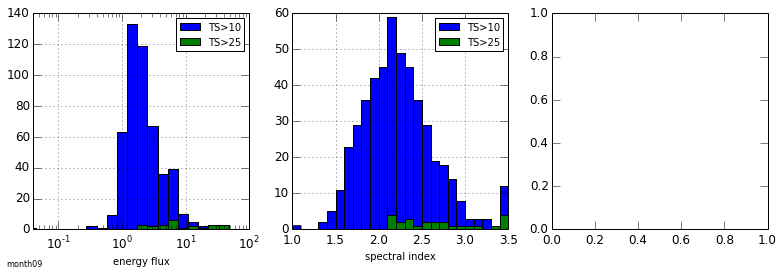

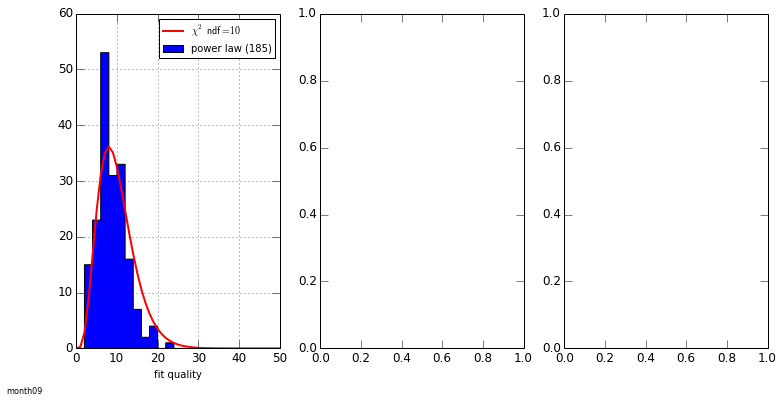

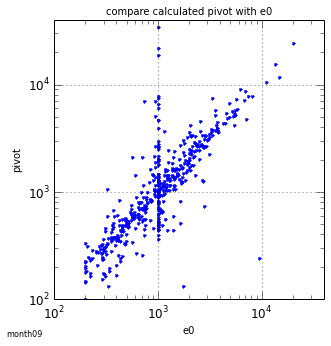

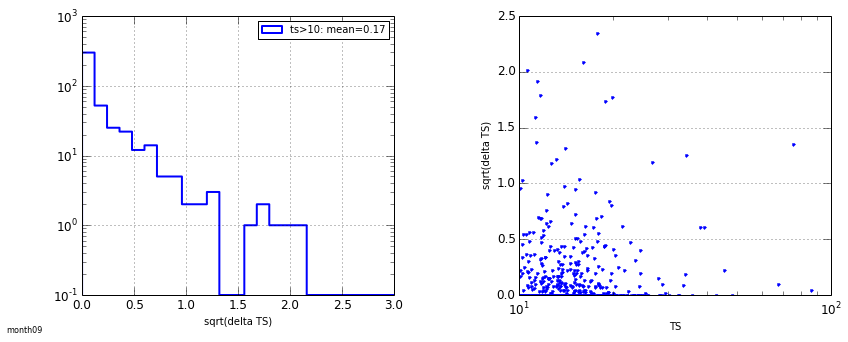

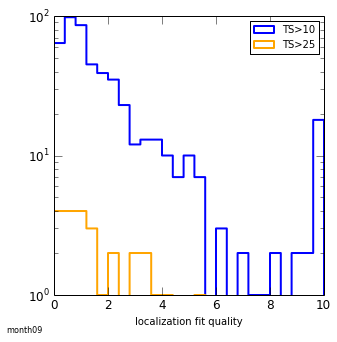

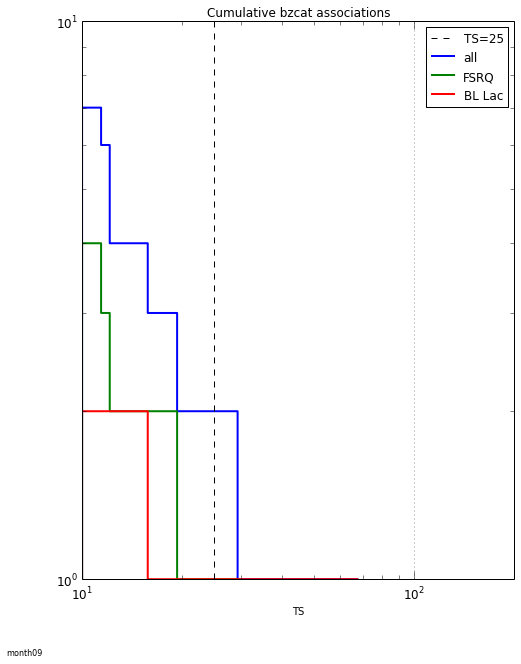

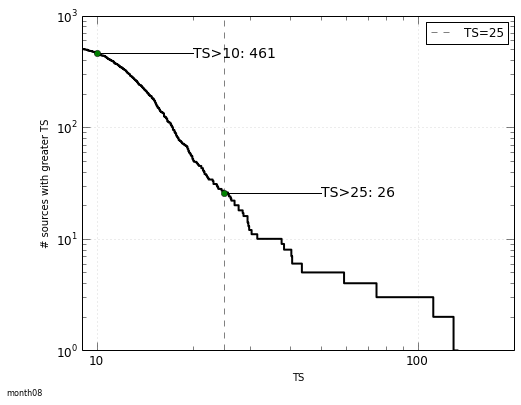

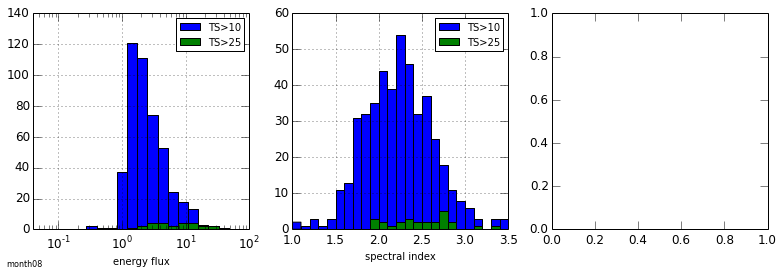

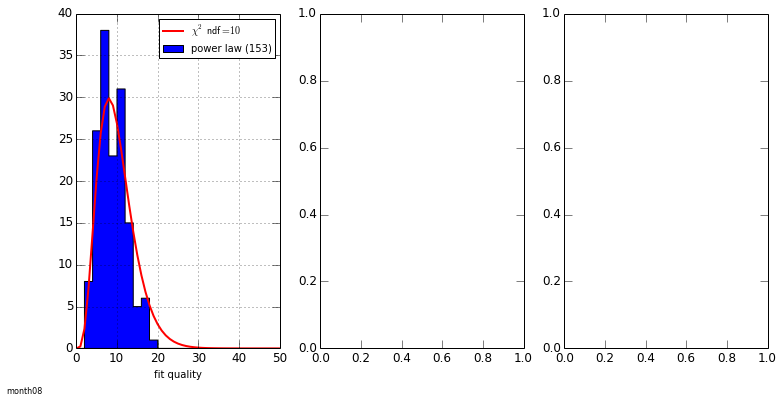

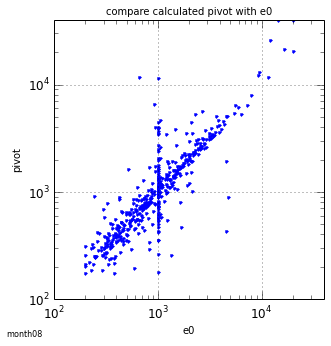

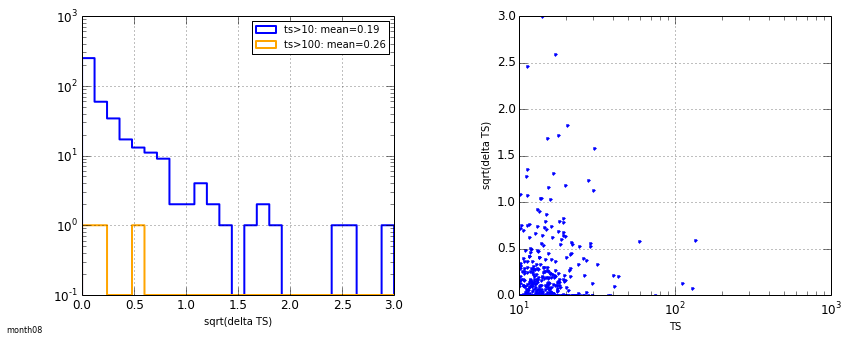

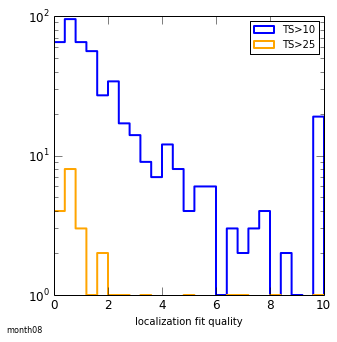

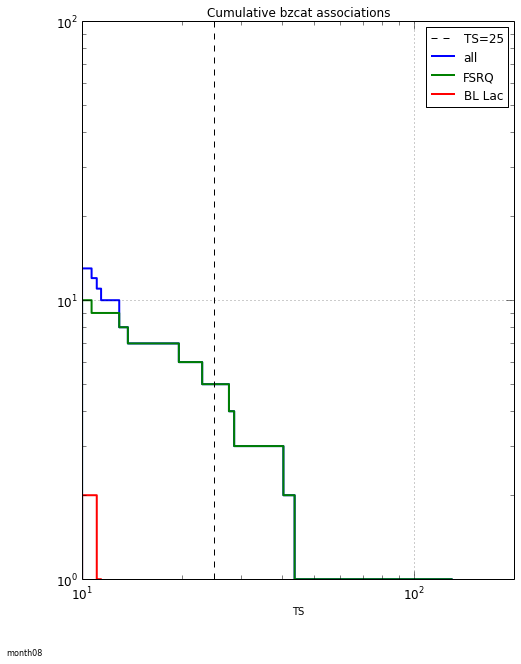

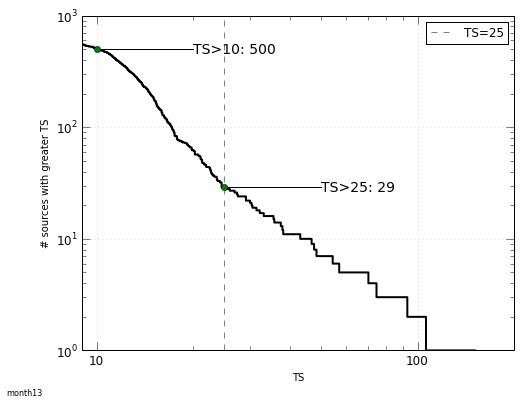

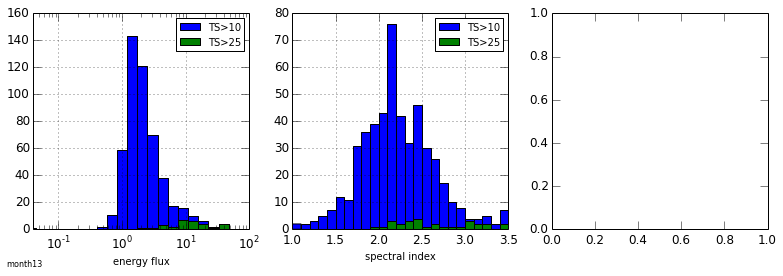

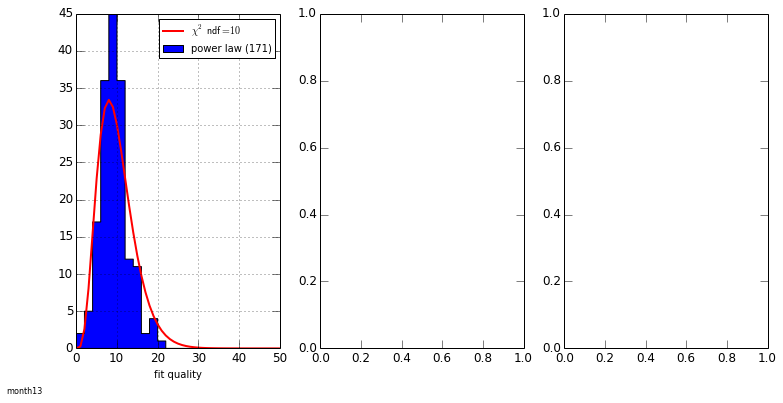

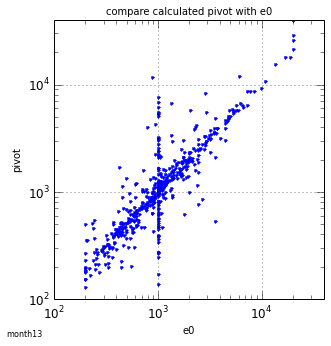

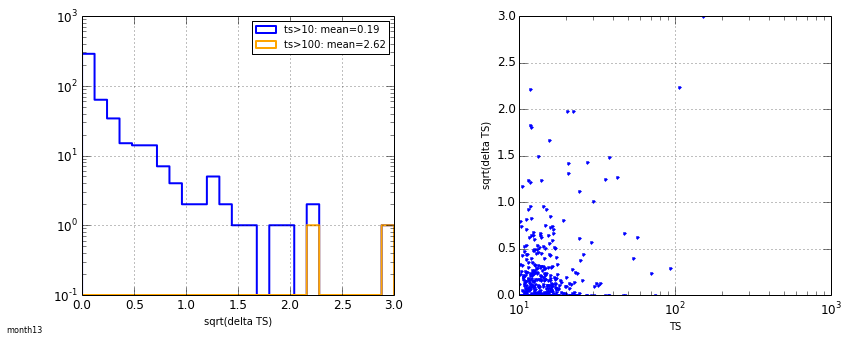

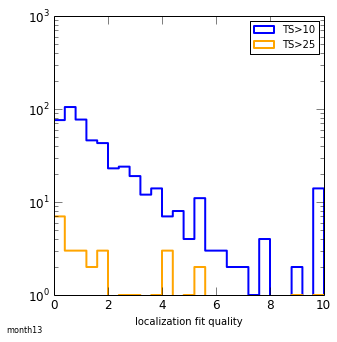

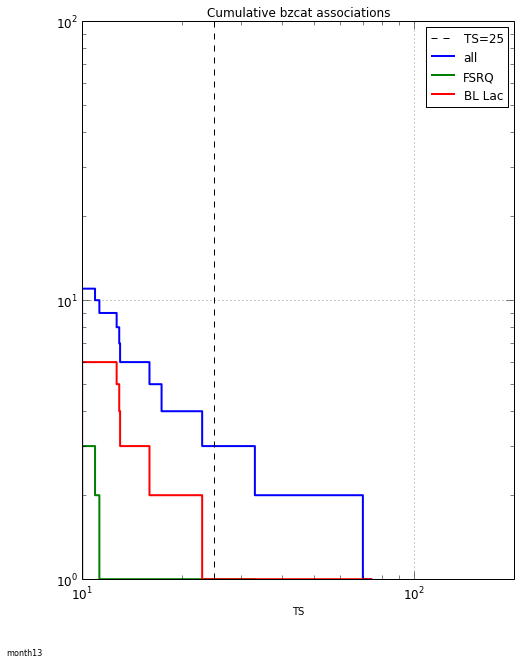

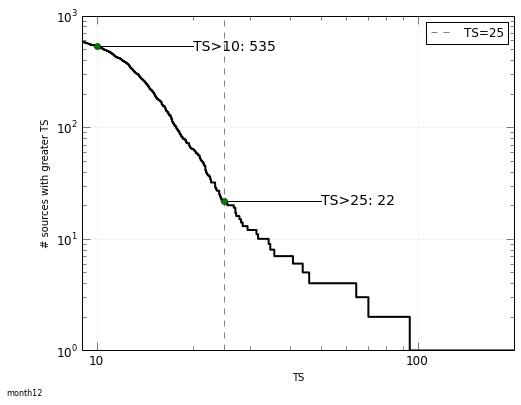

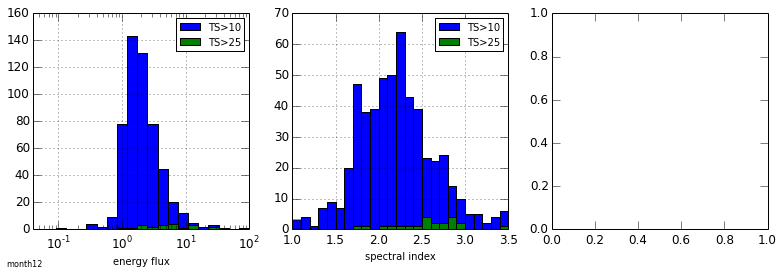

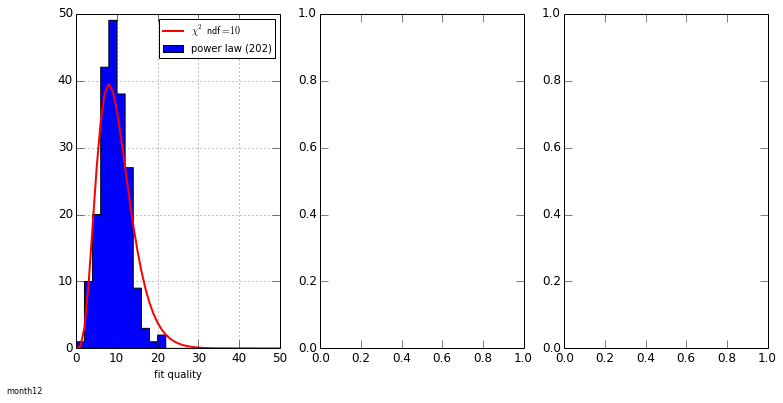

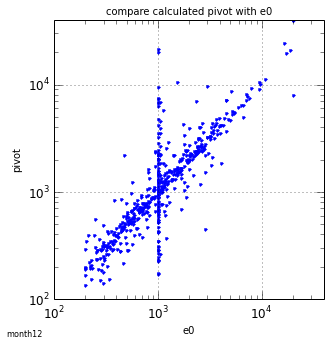

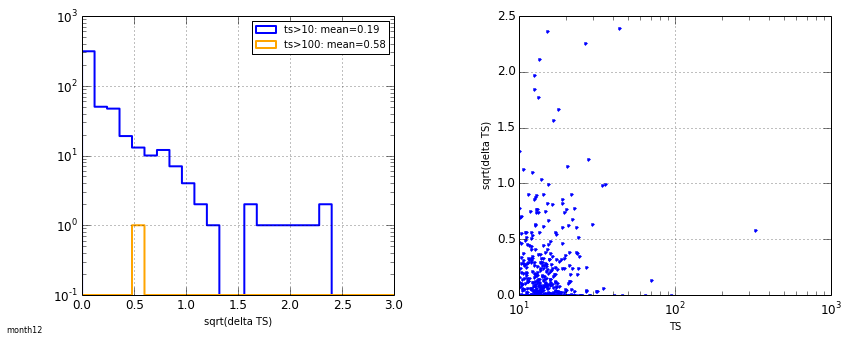

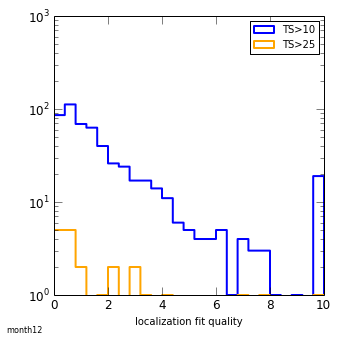

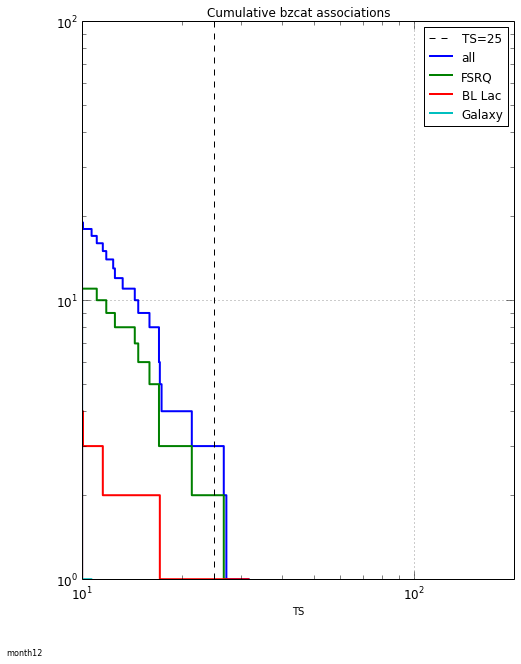

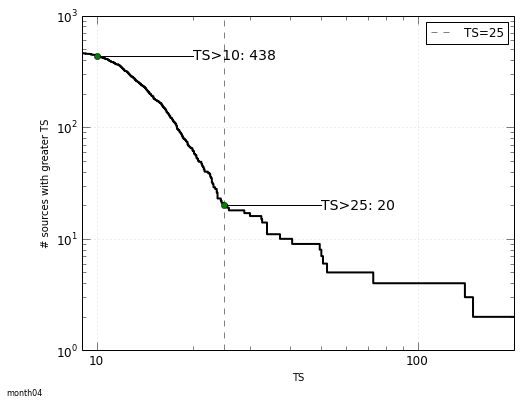

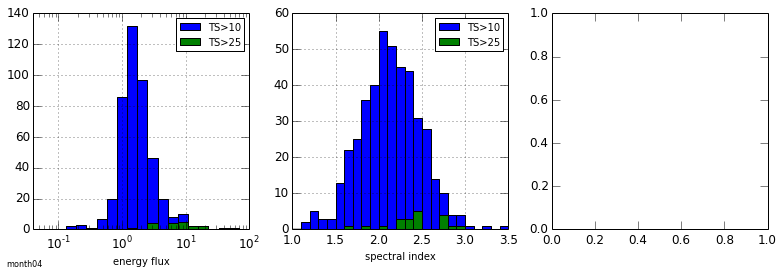

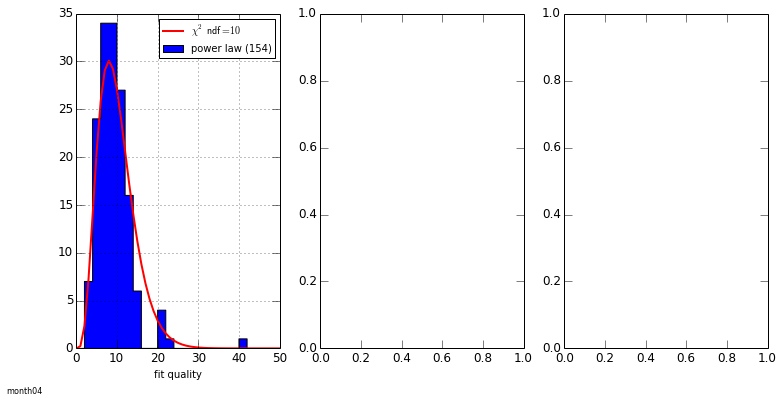

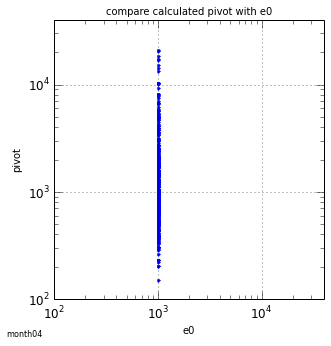

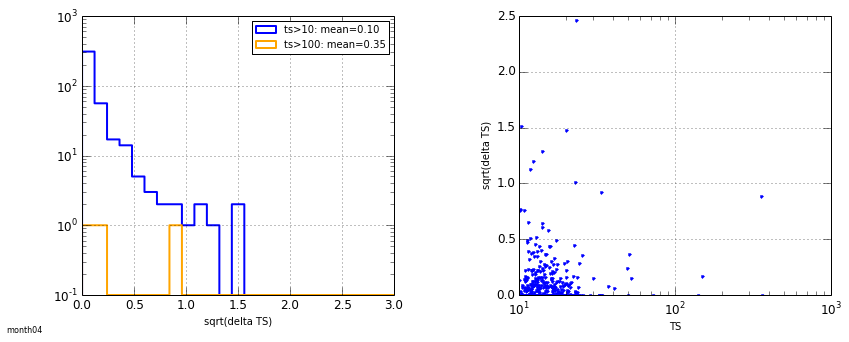

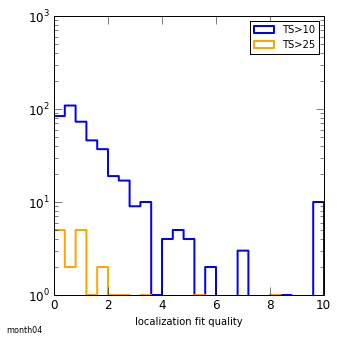

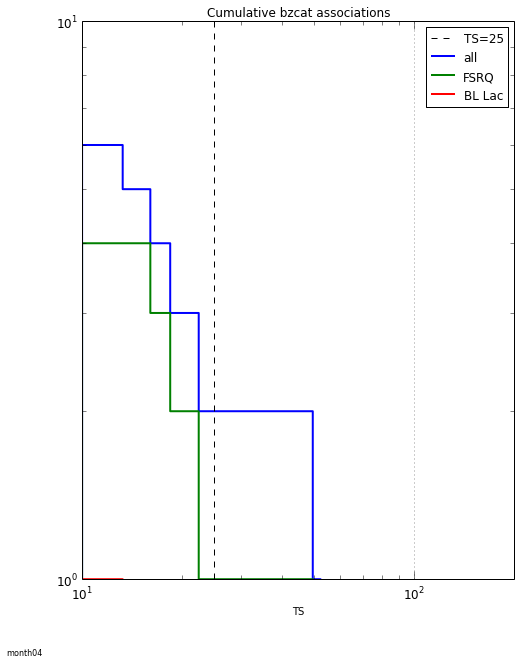

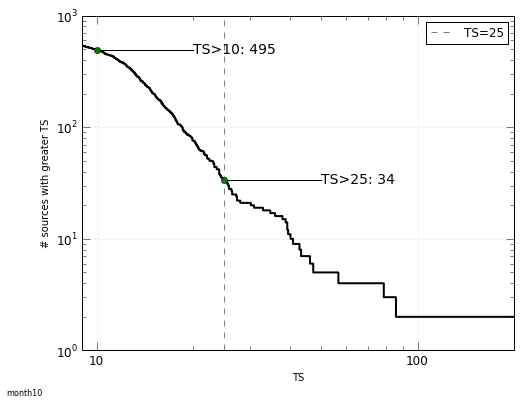

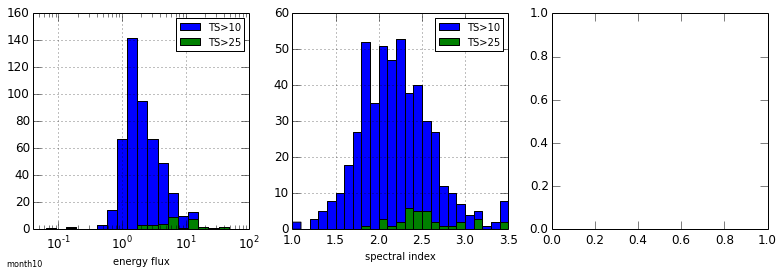

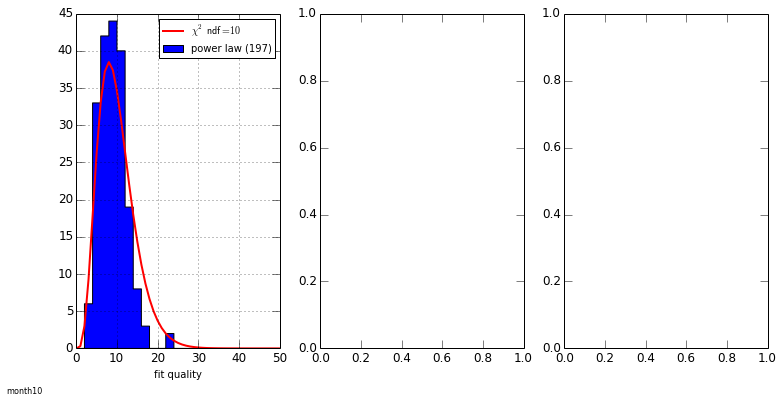

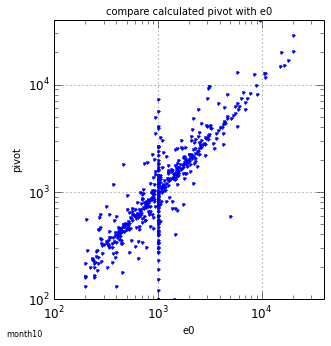

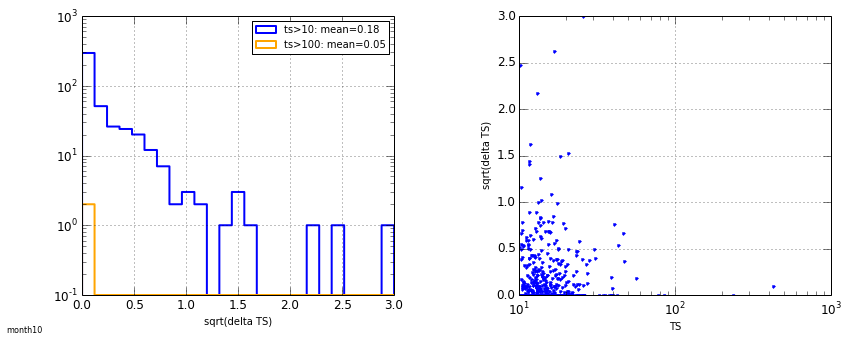

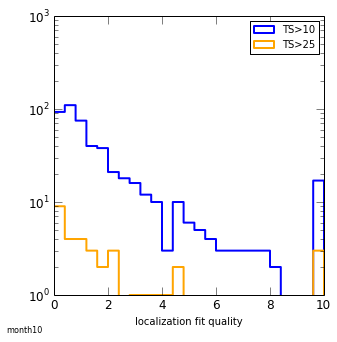

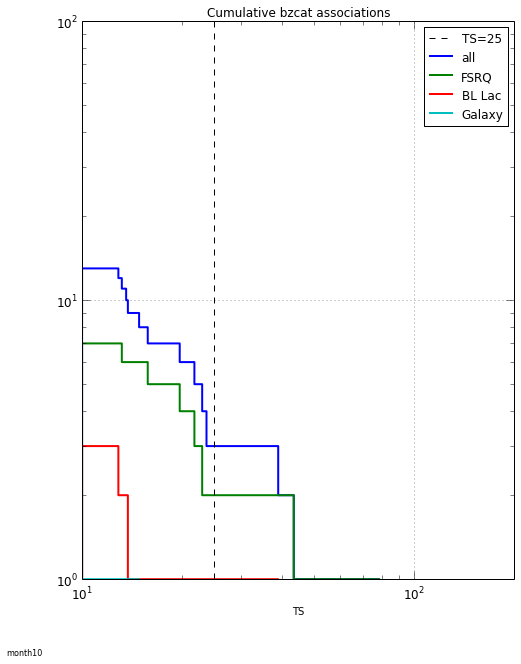

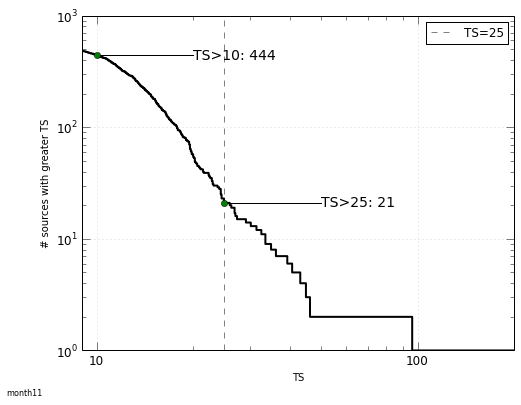

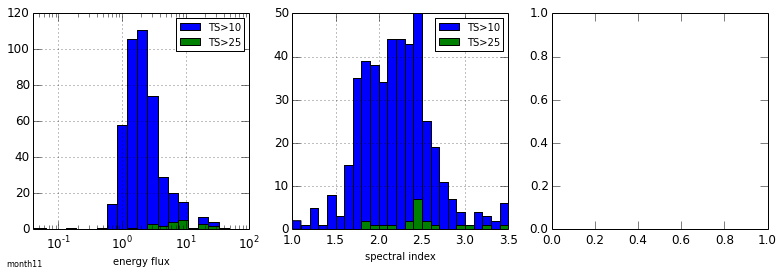

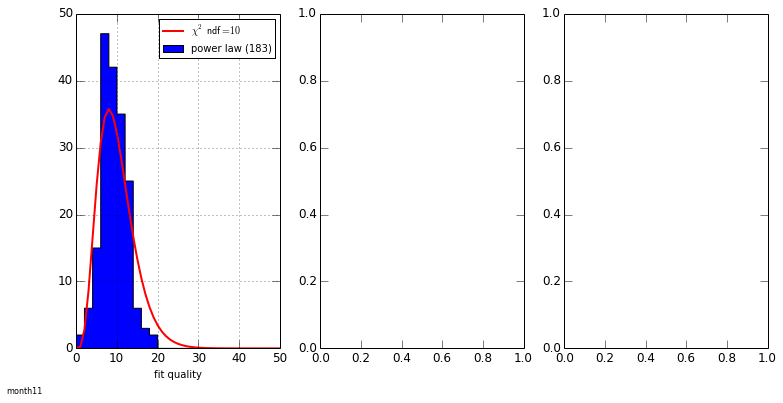

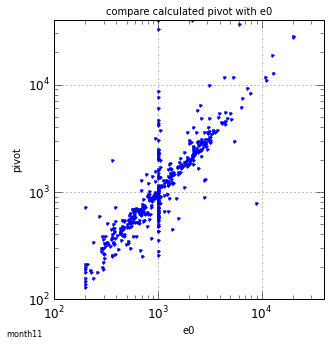

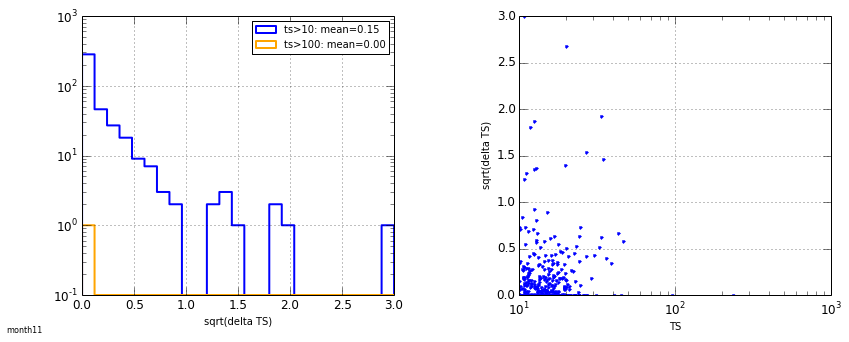

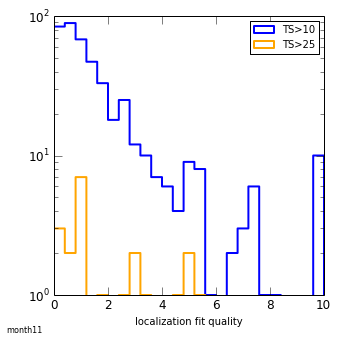

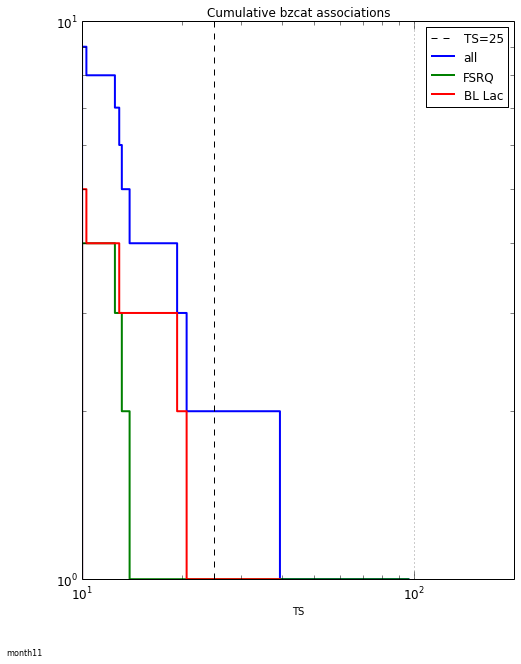

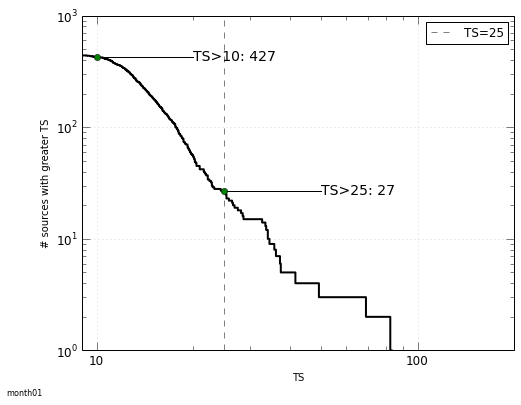

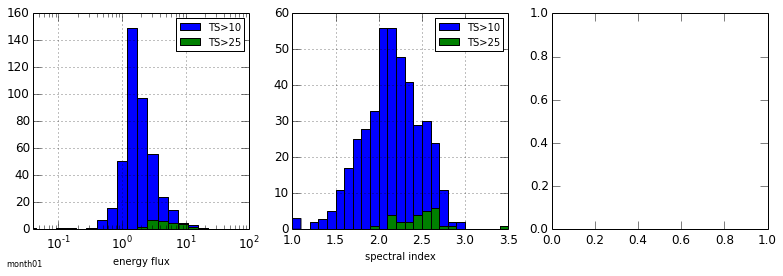

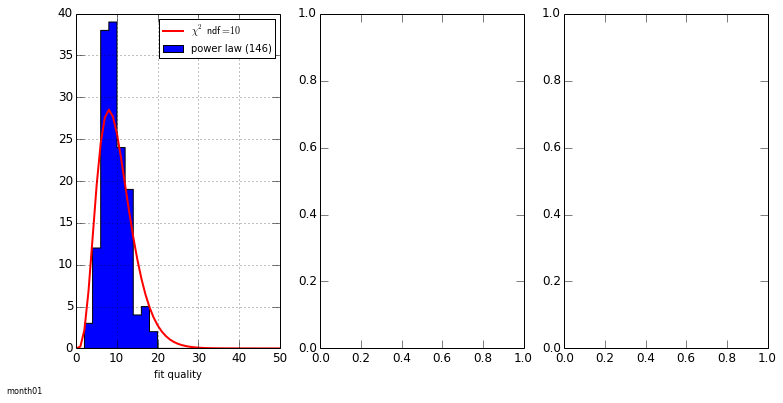

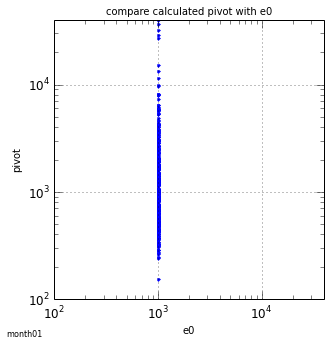

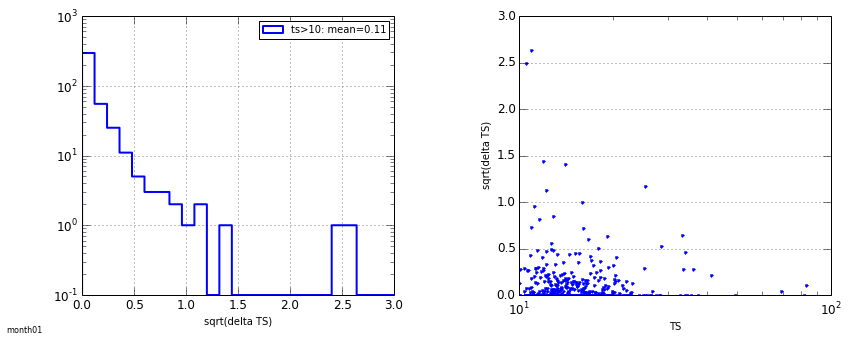

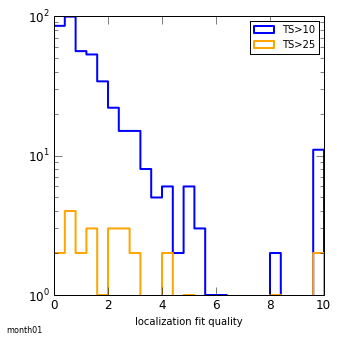

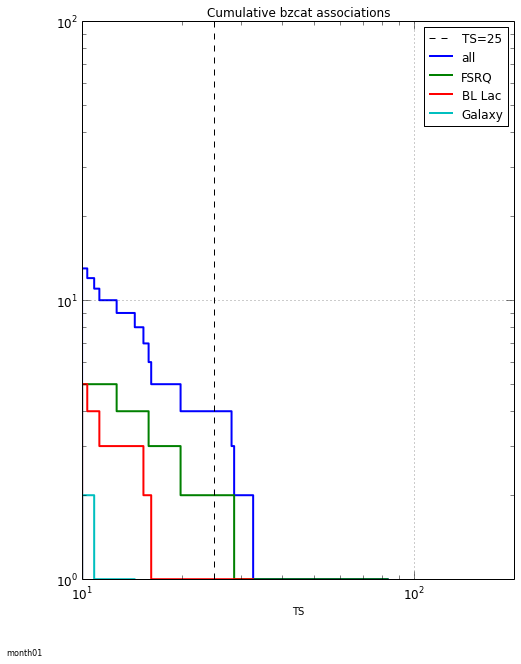

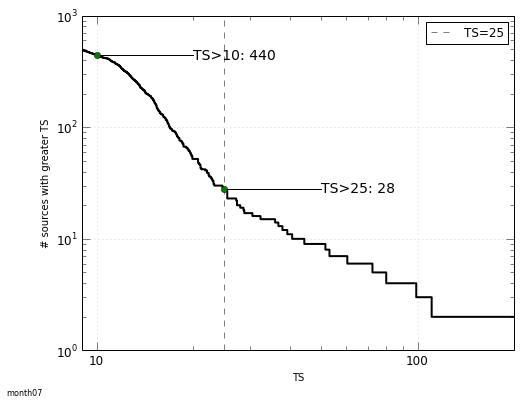

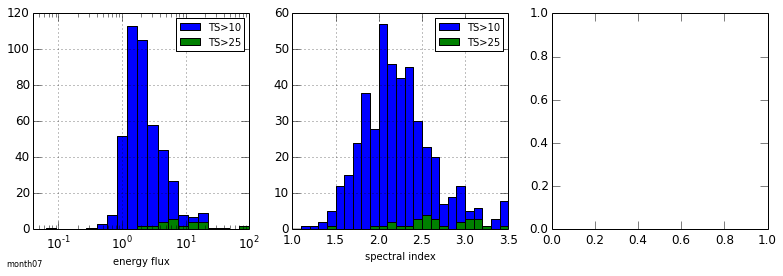

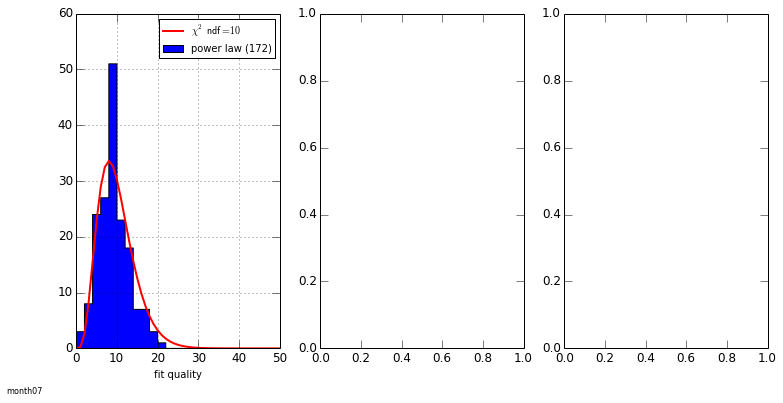

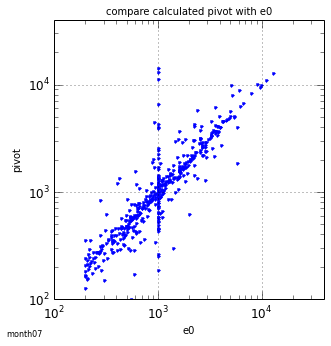

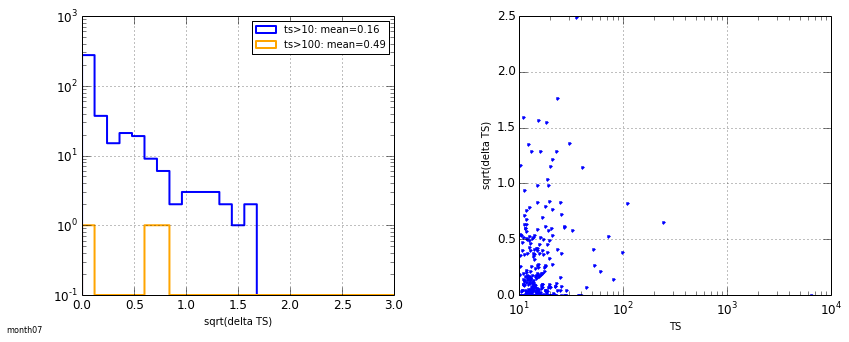

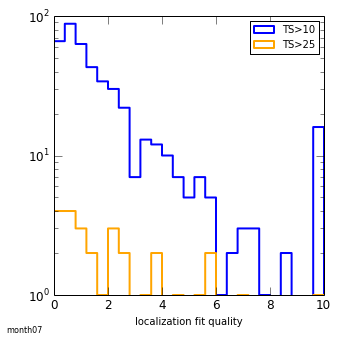

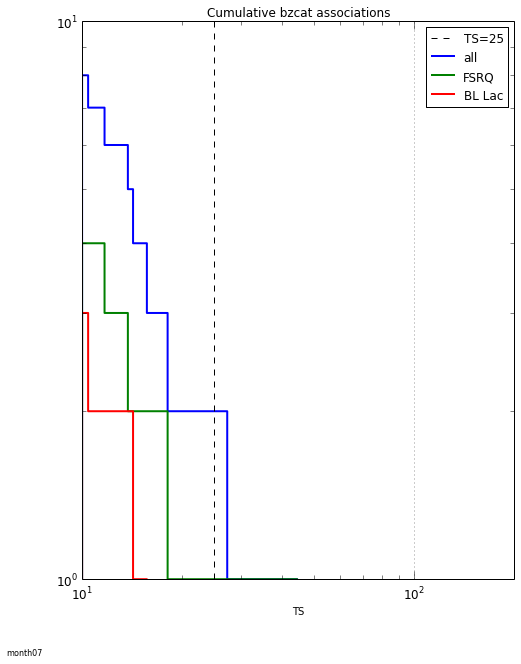

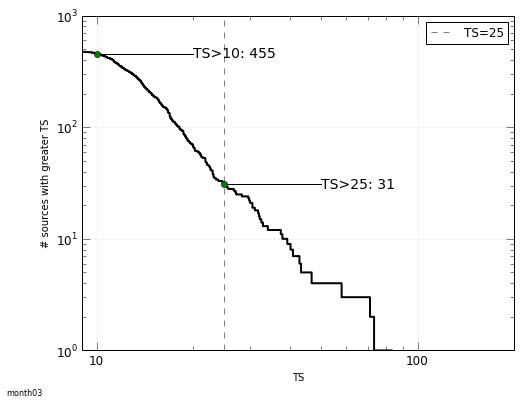

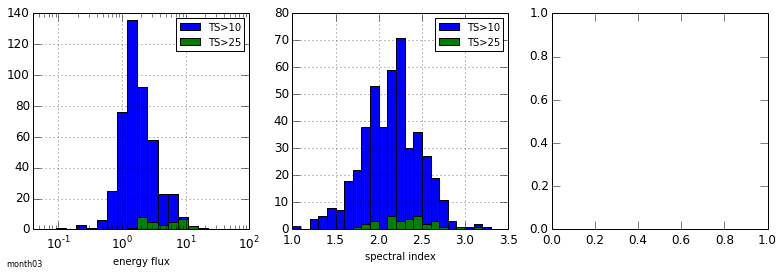

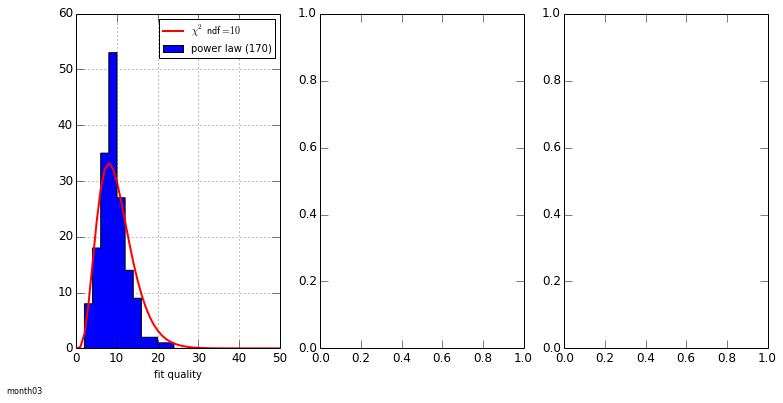

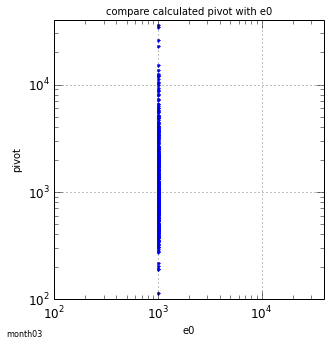

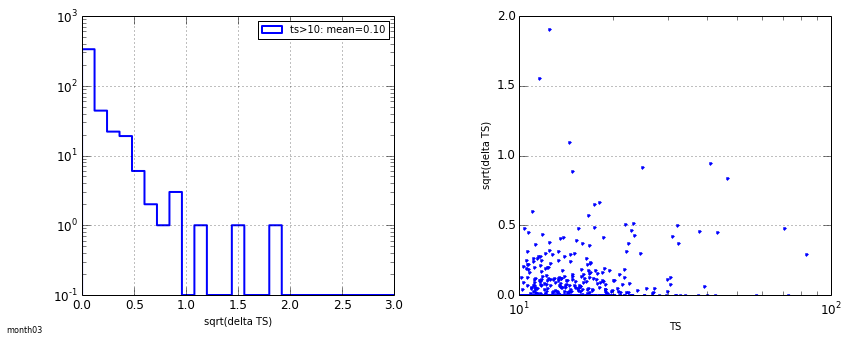

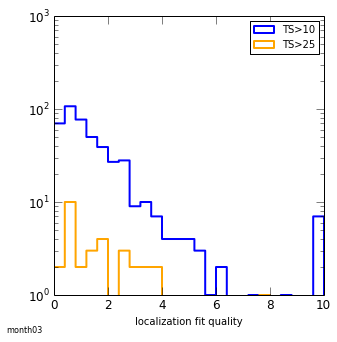

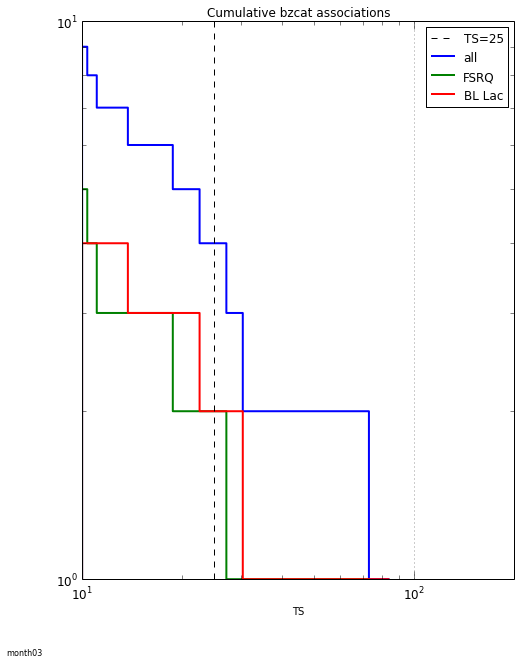

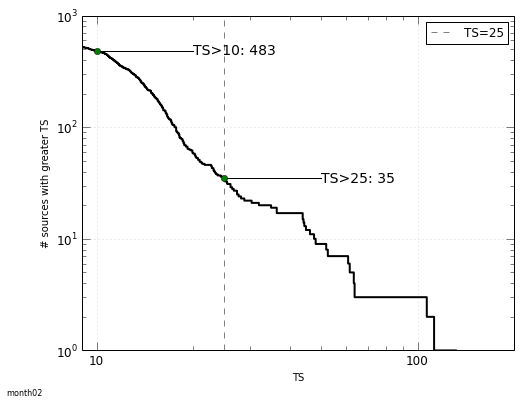

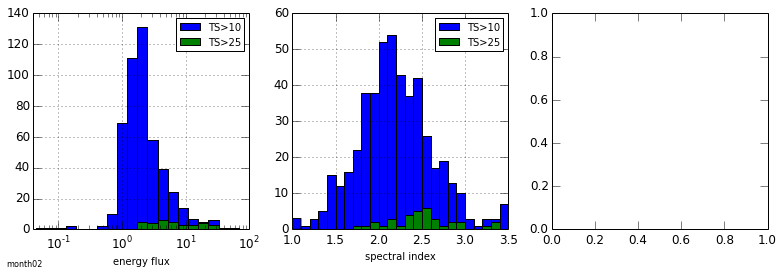

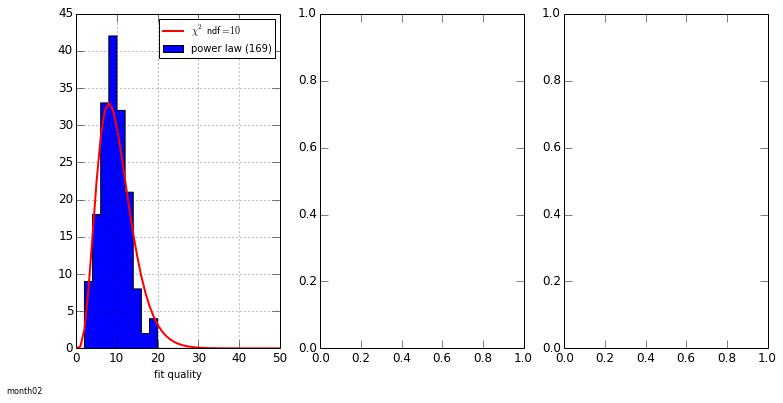

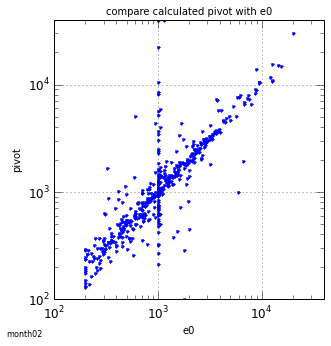

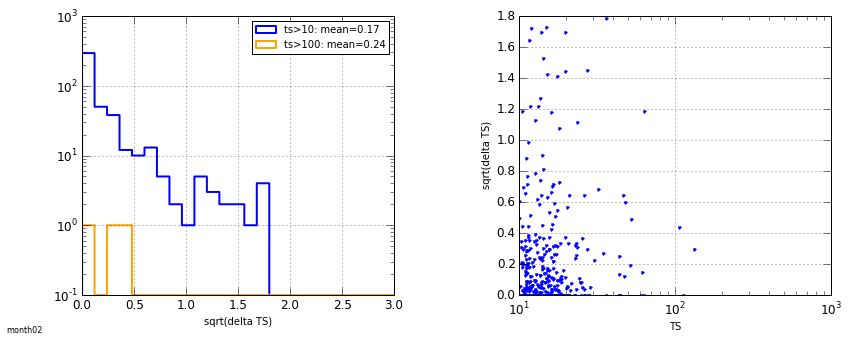

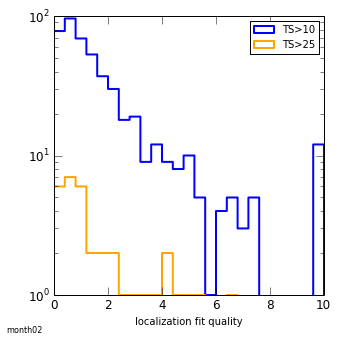

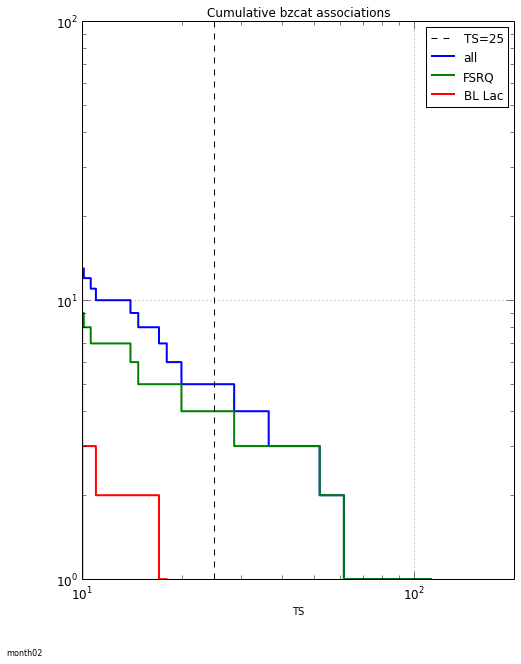

In [8]:
from uw.like2.pipeline import stream
from uw.like2.analyze import transientinfo, sourceinfo; 
map( reload,(transientinfo,sourceinfo),)
current = stream.recent_stream('P301_monthly*', lambda m: len(m)==7)
curdir = os.getcwd()
for m in current.keys():
    os.chdir(m)
    try:
        transientinfo.TransientInfo().all_plots()
    finally:
        os.chdir(curdir)